## Linear Regression

1. Linear Regression is one of the easiest algorithms in machine learning. 
2. Linear Regression aims to establish a linear relationship between the input variables(X) and single output variable(Y). When the input(X) is a single variable this model is called Simple Linear Regression and when there are mutiple input variables(X), it is called Multiple Linear Regression.

In this problem we have an input variable - X and one output variable - Y. And we want to build linear relationship between these variables. Here the input variable is called Independent Variable and the output variable is called Dependent Variable. 

The β_{1} is called a scale factor or coefficient and β_{0} is called bias coefficient. The bias coeffient gives an extra degree of freedom to this model. 

This equation is similar to the line equation y = mx + by=mx+b with m = β_{1} (Slope) and b = β_{0} (Intercept). So in this Simple Linear Regression model we want to draw a line between X and Y which estimates the relationship between X and Y.

$y = β_{0} + β_{1}x $

But how do we find these coefficients? That’s the learning procedure. We can find these using different approaches. One is called Ordinary Least Square Method and other one is called Gradient Descent Approach. We will use Ordinary Least Square Method in Simple Linear Regression and Gradient Descent Approach in Multiple Linear Regression in post.

### Ordinary Least Square Method

As the name suggests the idea behind this method is to reduce sum of squares of distance of each point from the regression line. While reducing the error, we will achieve the perfect values for $β_{0}$ and $β_{1}$

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ordinary Least Square method

In [2]:
# Reading Data and renaming column names
df = pd.read_csv('headbrain.csv')
df.columns = ['gender', 'age_range', 'head_size', 'brain_weight']
df.head()

,gender,age_range,head_size,brain_weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
x = df['head_size'].values
y = df['brain_weight'].values

x_mean = np.mean(x)
y_mean = np.mean(y)

In [4]:
# Initializing input and output variabled from the dataset
val1 = 0
val2 = 0
for i in range(len(df)):
    a = x[i] - x_mean
    b = y[i] - y_mean
    c = a ** 2
    val1 = val1 + (a * b)
    val2 = val2 + c
    
B1 = val1 / val2
B0 = y_mean - (B1 * x_mean)

print(B1, B0)

0.26342933948939945 325.57342104944223


### BrainWeight = 325.573421049 + 0.263429339489 ∗ HeadSize

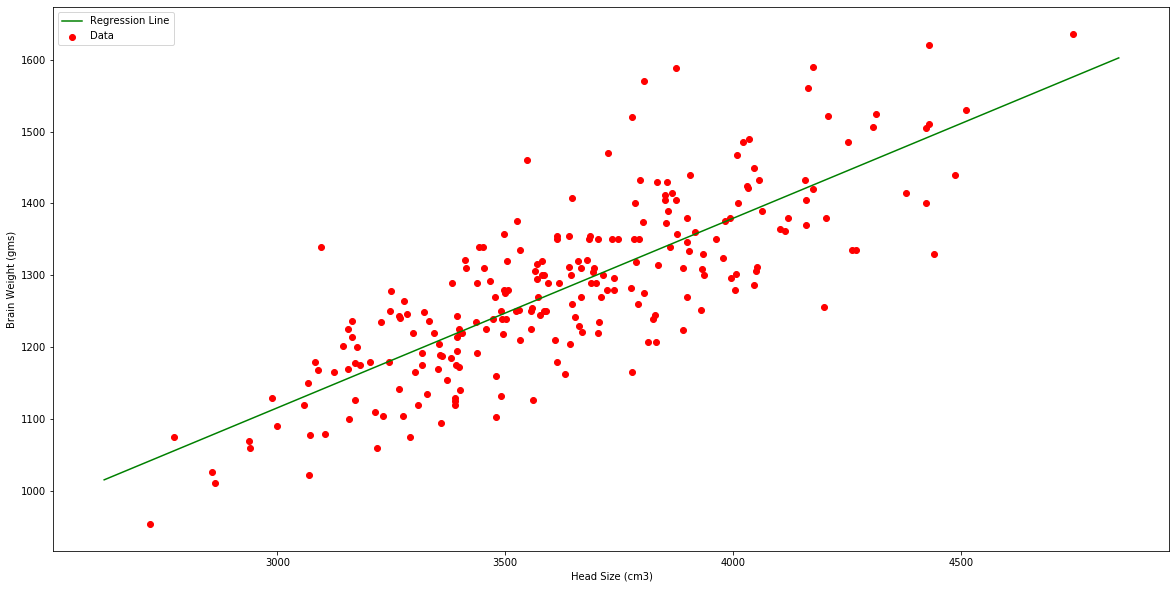

In [5]:
max_x = np.max(x) + 100
min_x = np.min(x) - 100

x_plot = np.linspace(min_x, max_x, 1000)
y_plot = B0 + (B1 * x_plot)

plt.rcParams['figure.figsize'] = (20.0, 10.0)

plt.plot(x_plot, y_plot, c='green', label='Regression Line')
plt.scatter(x, y, c='red', label='Data')

plt.xlabel('Head Size (cm3)')
plt.ylabel('Brain Weight (gms)')

plt.legend()

In [6]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(len(df)):
    y_pred = B0 + B1 * x[i]
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(df))
print(rmse)

72.1206213783709


In [12]:
# Calculating R2 Score
ss_t = 0
ss_r = 0
for i in range(len(df)):
    y_pred = B0 + B1 * x[i]
    ss_t += (y[i] - y_mean) ** 2
    ss_r += (y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


## Scikit Learn Approach

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
x = x.reshape((len(df), 1))

model = LinearRegression()

model.fit(x, y)

y_pred = model.predict(x)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

r2 = model.score(x, y)

print('Root Mean Square Error - ', rmse)
print('R2 Score - ', r2)

Root Mean Square Error -  72.1206213783709
R2 Score -  0.639311719957


### Root Mean Square Error

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

When standardized observations and forecasts are used as RMSE inputs, there is a direct relationship with the correlation coefficient. For example, if the correlation coefficient is 1, the RMSE will be 0, because all of the points lie on the regression line (and therefore there are no errors).

### R2 Score

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

### Ways to evaluate an OLS Model
1. R squared score or value
2. Root Mean Square Value
3. Overall F-Test

All these values depend upon :
1. Sum of Square Total (SST) - which means how far the data are from the mean
2. Sum of Squared Errors (SSE) - which means how far the data are from the model's predicted values

* SST - SSE = improvement in prediction from regression model, compared to mean model. 
* (SST -SSE)/SST = R2 Score. It is the proportional improvement in prediction from the regression model, compared to the mean model. It indicates the goodness of fit of the model.

#### R Squared
R-squared has the useful property that its scale is intuitive: it ranges from zero to one, with zero indicating that the proposed model does not improve prediction over the mean model, and one indicating perfect prediction. Improvement in the regression model results in proportional increases in R-squared.

####  F-Test
The F-test evaluates the null hypothesis that all regression coefficients are equal to zero versus the alternative that at least one is not. An equivalent null hypothesis is that R-squared equals zero. A significant F-test indicates that the observed R-squared is reliable and is not a spurious result of oddities in the data set. Thus the F-test determines whether the proposed relationship between the response variable and the set of predictors is statistically reliable and can be useful when the research objective is either prediction or explanation.

#### RMSE
The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

In [32]:
b = np.arange(10)
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
b = b.reshape((len(b), 1))

In [35]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
(b * a).shape

(10, 10)